***
# <font> Exploratory Data Analysis on WineQuality Dataset</font>
<p style="margin-left:10%; margin-right:10%;"> <font color=teal> 

***

## Overview of this Notebook
The most important element in any data science project is the data itself. It is extremely important that this data is as clear as possible, so that we do not misinterpret any structure inherent to the problem.  
Data Preparations does Data Transformations and Manipulations. This step is a very important step in Machine Learning model and takes typically 80% of the time in the entire life cycle. The real world data is mostly incomplete, and has several missing values. Missing values can be because of the unavailability of data or inconsistancy present in the data. There might be several errors and outliers in the data. 
Preprocessing of data involves various steps
1. Combinating attributes or columns  
2. Data Imputation
3. Data Cleaning
4. Data Imputation
5. Dummy Variables
6. Outlier Detection
7. Feature Scaling
8. Feature Engineering
9. Feature Selection
10. Feature Extration

Please select the  published conda envionment data-science-gmlv1_0_v1 before proceeding further. 

First the necessary imports are made. From ads, DatasetBrowser, dataset factory, feature_engineering are imported. pandas, numpy packages are also imported. From plots matplotlib.pyplot is imported.

In [3]:
import ads
import logging
import numpy as np
import os
import pandas as pd
import shutil
import tempfile
import warnings
from ads.dataset.dataset_browser import DatasetBrowser
from ads.dataset.factory import DatasetFactory
from os import path
from sqlalchemy import create_engine
import seaborn as sns

from ads.dataset.dataset_browser import DatasetBrowser
from ads.feature_engineering import feature_type_manager, FeatureType
import matplotlib.pyplot as plt
from os import path

warnings.filterwarnings('ignore')
logging.basicConfig(format='%(levelname)s:%(message)s', level=logging.ERROR)

In [4]:
ads.hello()



  O  o-o   o-o
 / \ |  \ |
o---o|   O o-o
|   ||  /     |
o   oo-o  o--o

ads v2.8.11
oci v2.114.0
ocifs v1.1.3




In [3]:
wine = pd.read_csv("winequalityN.csv")

WinequalityN.csv  dataset is downloaded as a csv file from <here> https://www.kaggle.com/datasets/rajyellow46/wine-quality </here>
In this example, the csv file is read in a pandas core framework. This can be checked by viewing the type of dataset

In [4]:
type(wine) 

pandas.core.frame.DataFrame

In [5]:
wine.head(20)


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,white,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,white,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,white,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,white,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,white,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [6]:
ds = DatasetFactory.from_dataframe(pd.DataFrame(wine), target = 'quality')

loop1:   0%|          | 0/4 [00:00<?, ?it/s]

In [7]:
type(ds)

ads.dataset.classification_dataset.MultiClassClassificationDataset

In [8]:
ds.head()

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [9]:
ds.shape

(6497, 13)

The wine dataset has 6497 rows and 13 attributes which is used to decide the quality of wine. This is a multi catagory dataset having 7 different wine categories.


In [10]:
wine['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

This dataset is a typical case of case imbalance problem. Class 9 has minimum number of rows. Also there are some null values. 

In [11]:
wine.isna().sum()

type                     0
fixed_acidity           10
volatile_acidity         8
citric_acid              3
residual_sugar           2
chlorides                2
free_sulfur_dioxide      0
total_sulfur_dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

The null values are minimum when compared to the number of tuples. So those null value rows can be deleted. The 'dropna' method is used to drop the rows having null values. 

In [12]:
wine_notnull = wine.dropna()

In [13]:
wine_notnull.shape

(6463, 13)

In [14]:
wine['type'].value_counts()

white    4898
red      1599
Name: type, dtype: int64

In [15]:
ds.show_in_notebook()

Accordion(children=(HTML(value='<h1>Name: User Provided DataFrame</h1><h3>Type: MultiClassClassificationDatase…

Wine Dataset is an example of Multiclass Classification model. 


ADS offers a smart visualization tool that automatically detects the type of your data columns and offers the best way to plot your data. You can also create custom visualizations with ADS by using your preferred plotting libraries and packages. The correlation plot gives an idea on totally correlated pairwise attributes. Highly correlated attributes contribute less to decision making. So it is better to avoid those attributes. So the tranformed dataset ensures that such attributes are avoided. The drop column feature drops those columns which are correlated. Show_in_notebook() shows these correlations in the form of heatmaps. 
The ADS show_in_notebook() method creates a comprehensive preview of all the basic information about a dataset including:

a. The predictive data type (for example, regression, binary classification, or multinomial classification).

b. The number of columns and rows.

c. Feature type information.

d. Summary visualization of each feature.

e. The correlation map.

f. Any warnings about data conditions that you should be aware of.
To improve plotting performance, the ADS show_in_notebook() method uses an optimized subset of the data. This smart sample is selected so that it is statistically representative of the full dataset. The correlation map is only displayed when the data only has numerical (continuous or oridinal) columns.
In WineDataset there exists no feature warnings


In [16]:
ds.get_recommendations()

Output()

In [17]:
ds.select_best_features()

quality,alcohol,density,volatile_acidity,chlorides,type,free_sulfur_dioxide,citric_acid,residual_sugar,fixed_acidity,total_sulfur_dioxide,sulphates,pH
6,8.800000,1.001000,0.270000,0.045000,white,45.000000,0.360000,20.700000,7.000000,170.000000,0.450000,3.000000
6,9.500000,0.994000,0.300000,0.049000,white,14.000000,0.340000,1.600000,6.300000,132.000000,0.490000,3.300000
6,10.100000,0.995100,0.280000,0.050000,white,30.000000,0.400000,6.900000,8.100000,97.000000,0.440000,3.260000
6,9.900000,0.995600,0.230000,0.058000,white,47.000000,0.320000,8.500000,7.200000,186.000000,0.400000,3.190000
6,9.900000,0.995600,0.230000,0.058000,white,47.000000,0.320000,8.500000,7.200000,186.000000,0.400000,3.190000


MultiClassClassificationDataset(target: quality) 6,497 rows, 13 columns

The select best features automatically removes the missing values. 

## Automated Transformations
ADS has built in automatic transform tools for datasets. When the get_recommendations() tool is applied to an ADSDataset object, it shows the user detected issues with the data and recommends changes to apply to the dataset. You can accept the changes is as easy as clicking a button in the drop down menu. After all the changes are applied, the transformed dataset can be retrieved by calling get_transformed_dataset().

In [18]:
ds.auto_transform()

loop1:   0%|          | 0/7 [00:00<?, ?it/s]

quality,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,density,pH,sulphates,alcohol
6,white,7.000000,0.270000,0.360000,20.700000,0.045000,45.000000,1.001000,3.000000,0.450000,8.800000
6,white,6.300000,0.300000,0.340000,1.600000,0.049000,14.000000,0.994000,3.300000,0.490000,9.500000
6,white,8.100000,0.280000,0.400000,6.900000,0.050000,30.000000,0.995100,3.260000,0.440000,10.100000
6,white,7.200000,0.230000,0.320000,8.500000,0.058000,47.000000,0.995600,3.190000,0.400000,9.900000
6,white,7.200000,0.230000,0.320000,8.500000,0.058000,47.000000,0.995600,3.190000,0.400000,9.900000


MultiClassClassificationDataset(target: quality) 6,497 rows, 12 columns

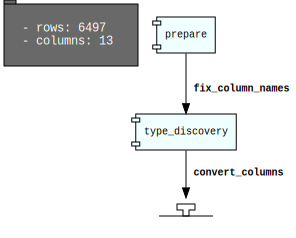

In [19]:
ds.visualize_transforms()

You can visualize the transformation that has been performed on a dataset by calling visualize_transforms(). 
The preprocessed data is then used for training the machine learning model 